<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP_Spam%20Detection%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Input, GlobalMaxPooling1D, MaxPooling1D, Embedding

# Retrieving and Formatting Data

In [27]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1)
df.columns=['labels','data']
df['b_labels'] = df['labels'].map({'ham': 1, 'spam':0})
Y = df['b_labels'].values

df.head()

File ‘spam.csv’ already there; not retrieving.



,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


#Train test split

In [49]:
df_train,df_test,Ytrain,Ytest = train_test_split(df['data'], Y, test_size = 0.33)

# Converting sentences to sequences

In [50]:
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

# Word -> Integer mapping

In [51]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("Found %s unique tokens"%V)

Found 7213 unique tokens


# Padding Sequences

In [52]:
data_train = pad_sequences(sequences_train)
print("Shape of data train tensor:", data_train.shape)

# Get sequence length for the test set
T = data_train.shape[1]



Shape of data train tensor: (3733, 120)


In [53]:
data_test = pad_sequences(sequences_test, maxlen = T)
print("Shape of data test tensor:", data_test.shape)

Shape of data test tensor: (1839, 120)


# Creating the Model

In [66]:
D = 20

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape = (T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32,3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation = 'sigmoid')(x)

model = Model(i,x)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the Model

In [67]:
r = model.fit(data_train, Ytrain, validation_data = (data_test, Ytest), epochs = 5)

Epoch 1/5
117/117 [==============================] - 2s 17ms/step - loss: 0.4298 - accuracy: 0.8663 - val_loss: 0.3916 - val_accuracy: 0.8651
Epoch 2/5
117/117 [==============================] - 2s 14ms/step - loss: 0.3274 - accuracy: 0.8811 - val_loss: 0.1757 - val_accuracy: 0.9418
Epoch 3/5
117/117 [==============================] - 2s 14ms/step - loss: 0.1391 - accuracy: 0.9595 - val_loss: 0.1531 - val_accuracy: 0.9608
Epoch 4/5
117/117 [==============================] - 2s 13ms/step - loss: 0.0991 - accuracy: 0.9748 - val_loss: 0.1490 - val_accuracy: 0.9625
Epoch 5/5
117/117 [==============================] - 2s 14ms/step - loss: 0.0871 - accuracy: 0.9796 - val_loss: 0.1558 - val_accuracy: 0.9663


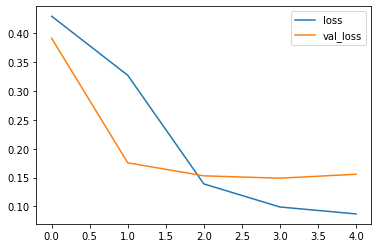

In [70]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

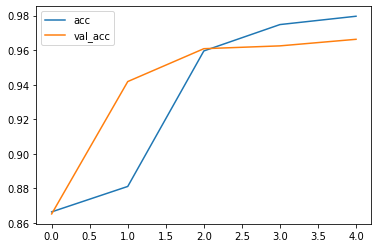

In [71]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

TypeError: ignored